<font size="5">PURPOSE OF PROJECT: CREATE A REGRESSION MODEL TO PREDICT MONTHLY INCOME </font>

<font size="4"> My project is split into 3 parts. Each notebook focuses on a specific portion of the machine learning workflow. This notebook is part 3 out of 3 of my Regression Model Project. </font>
    
<font size="4"> The focus in this notebook are data preparation, model training, and model evaluation. See part 1 and part 2 for notebooks on data cleaning and feature selection. </font>

<font size="4"> Model Performance Summary </font>

Training Score: 0.9621

Testing Score:  0.9479

Below is a distribution of actual vs. predicted values. As you can see, the model can predict monthly incomes on the testing set quite well. Furthermore, there are no signs of overfitting.

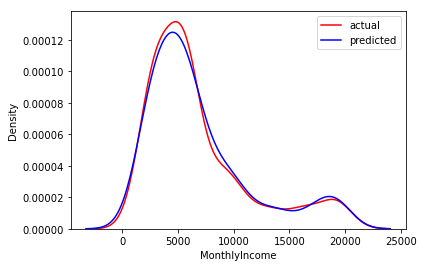

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
'''
Read the CSV.

NOTE: This data was cleaned in notebook part 1.
'''

df = pd.read_csv('cleaned_data_jda_group1_ibm.csv')

In [18]:
'''
One hot encode all categorical variables and split the data set into training and testing sets.
'''

onehot = pd.get_dummies(data=df, columns= ['Attrition','JobRole','EducationField'])

X = onehot.drop(['MonthlyIncome','Unnamed: 0'],axis=1)
y = onehot['MonthlyIncome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)



In [19]:
'''
Use GridSearchCV on the training set for hyperparameter tuning to maximize model performance.
'''

#n_jobs is set to -1, to take advanatge of multiple threads. This makes GridSearchCV faster.
grid = GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 10, 15, 20,25,30,45], 
                         'min_samples_leaf': [1,3,6,10,15,20,25,50,75,100]},n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 10, 15, 20, 25, 30, 45],
                         'min_samples_leaf': [1, 3, 6, 10, 15, 20, 25, 50, 75,
                                              100]})

In [20]:
'''
Get the best parameters from GridSearchCV.
'''

grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [21]:
'''
Fit the Random Forest Regressor with the optimal hyperparameters from GridSearchCV.
'''

rf = RandomForestRegressor(max_depth=5,min_samples_leaf=1)

rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [25]:
'''
r-squared for the training set.
'''

rf.score(X_train,y_train)

0.9621096785225738

In [26]:
'''
r-squared for the testing set.
'''

rf.score(X_test,y_test)

0.9479530422727176

C:\Users\Angelo Gaerlan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Angelo Gaerlan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


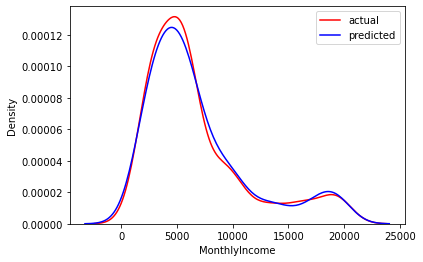

In [27]:
'''
Plot the distributions of actual vs. predicted.
'''

test_predict = rf.predict(X_test)
test_labels = y_test

ax1 = sns.distplot(test_predict, hist=False, color= 'r', label = 'predicted')
sns.distplot(test_labels, hist=False, color='b', label='actual', ax=ax1)
plt.legend(['actual','predicted'])